# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding data

In [715]:
#importing libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import sklearn

In [716]:
#reading data
day=pd.read_csv("day.csv",parse_dates=['dteday'])

In [717]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [718]:
pd.pivot_table(values=['cnt'],index=['mnth'],columns=['season'],data=day,aggfunc=np.sum)

cnt                              
season         1         2         3         4
mnth                                          
1       134933.0       NaN       NaN       NaN
2       149518.0       NaN       NaN       NaN
3       142065.0   86855.0       NaN       NaN
4            NaN  269094.0       NaN       NaN
5            NaN  331686.0       NaN       NaN
6            NaN  230954.0  115388.0       NaN
7            NaN       NaN  344948.0       NaN
8            NaN       NaN  351194.0       NaN
9            NaN       NaN  249599.0   96392.0
10           NaN       NaN       NaN  322352.0
11           NaN       NaN       NaN  254831.0
12       42998.0       NaN       NaN  168038.0

In [719]:
day.mnth.groupby(day.season).sum()

season
1     558
2     856
3    1446
4    1904
Name: mnth, dtype: int64

In [720]:
day.shape

(730, 16)

In [721]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [722]:
#descriptive statistics
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [723]:
#checking null values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [724]:
#defining function to change to categorical variable
def season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    elif x==4:
        return "winter"

In [725]:
#applying season function
day.season=day.season.apply(season)

In [726]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [727]:
#defining function to change to categorical variable
def year(x):
    if x==0:
        return 2018
    elif x==1:
        return 2019

In [728]:
#applying year function
day.yr=day.yr.apply(year)

In [729]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [730]:
#defining function to change to categorical variable
def weathersituation(x):
    if  x==1:
        return "Clear"
    elif x==2:
        return "Misty"
    elif x==3:
        return "Rainy"
    else:
        return "Heavy Rain"

In [731]:
#applying function
day.weathersit=day.weathersit.apply(weathersituation)

In [732]:
day.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,1,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,2,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,spring,2018,1,0,6,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,spring,2018,1,0,0,0,Misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [733]:
#defining function to change to categorical variable
def dayofweek(x):
    return x.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'})

In [734]:
#applying function
day[['weekday']]=day[['weekday']].apply(dayofweek)

In [735]:
day.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,spring,2018,1,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,spring,2018,1,0,Sunday,0,Misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [736]:
#defining function to change to categorical variable
def month(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                  7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [737]:
#applying function
day[['mnth']]=day[['mnth']].apply(month)

In [738]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [739]:
#converting numeric to object datatype
day.holiday=day.holiday.astype("object")
day.workingday=day.workingday.astype("object")
day.yr=day.yr.astype("object")

## Data Visualization

### Univariate Analysis

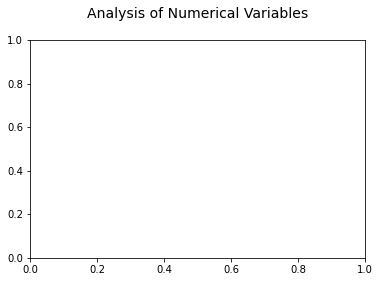

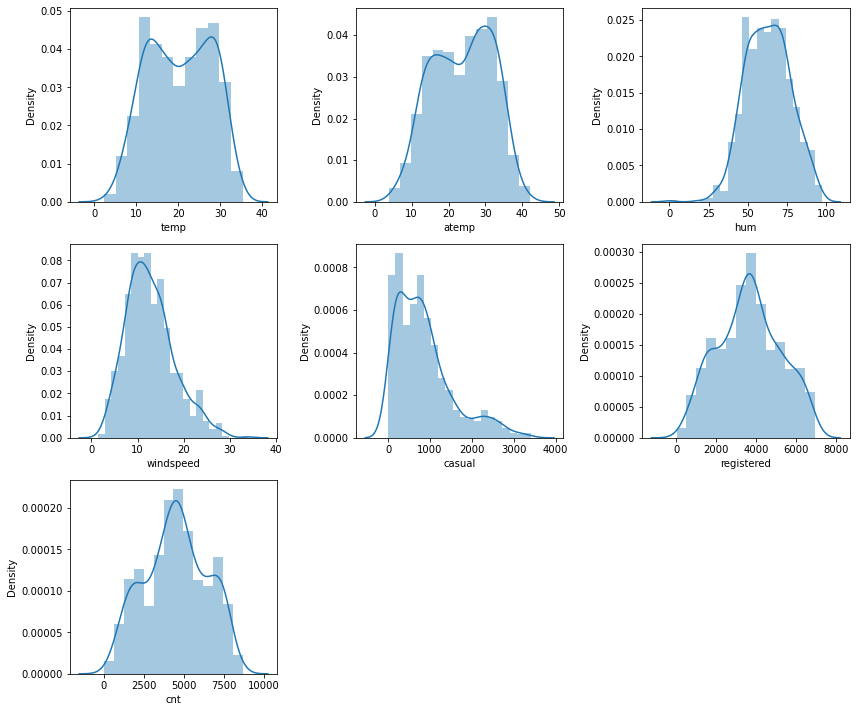

In [740]:
#histogram of distribution of numerical variables
plt.title("Analysis of Numerical Variables\n",fontsize=14)
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
sns.distplot(day.temp)
plt.subplot(3,3,2)
sns.distplot(day.atemp)
plt.subplot(3,3,3)
sns.distplot(day.hum)
plt.subplot(3,3,4)
sns.distplot(day.windspeed)
plt.subplot(3,3,5)
sns.distplot(day.casual)
plt.subplot(3,3,6)
sns.distplot(day.registered)
plt.subplot(3,3,7)
sns.distplot(day.cnt)
plt.tight_layout()
plt.show()

### `Insights:`

- Cnt and Registered are similar in their distribution, while casual is left leaning
- temp and atemp have similar distribution


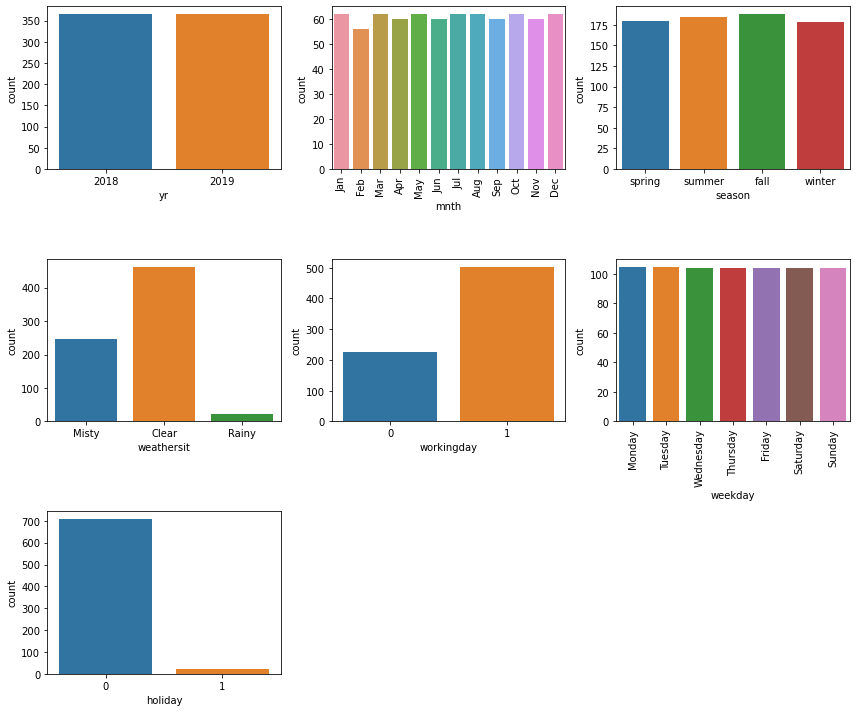

In [741]:
#countplot for categorical variables
plt.figure(figsize=(12,10))
plt.title("Analysis of Categorical Variables\n\n",fontsize=20)
plt.subplot(3,3,1)
sns.countplot(day.yr)

plt.subplot(3,3,2)
sns.countplot(day.mnth)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(day.season)

plt.subplot(3,3,4)
sns.countplot(day.weathersit)

plt.subplot(3,3,5)
sns.countplot(day.workingday)

plt.subplot(3,3,6)
sns.countplot(day.weekday)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(day.holiday)

plt.tight_layout()

plt.show()

### `Insights:`
- More customers have used shared bikes on Clear weather days.
- Holidays are the days with the least number of consumer usage.

## Bivariate Analysis

### Numerical Variables

In [742]:
#descriptive statistics
day.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [743]:
#dropping instant as it is an index column
day.drop('instant',axis=1,inplace=True)

In [744]:
#selecting all numerical variables
df_num=day.select_dtypes(exclude=['object','category'])

In [745]:
#numerical variable column names
df_num.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

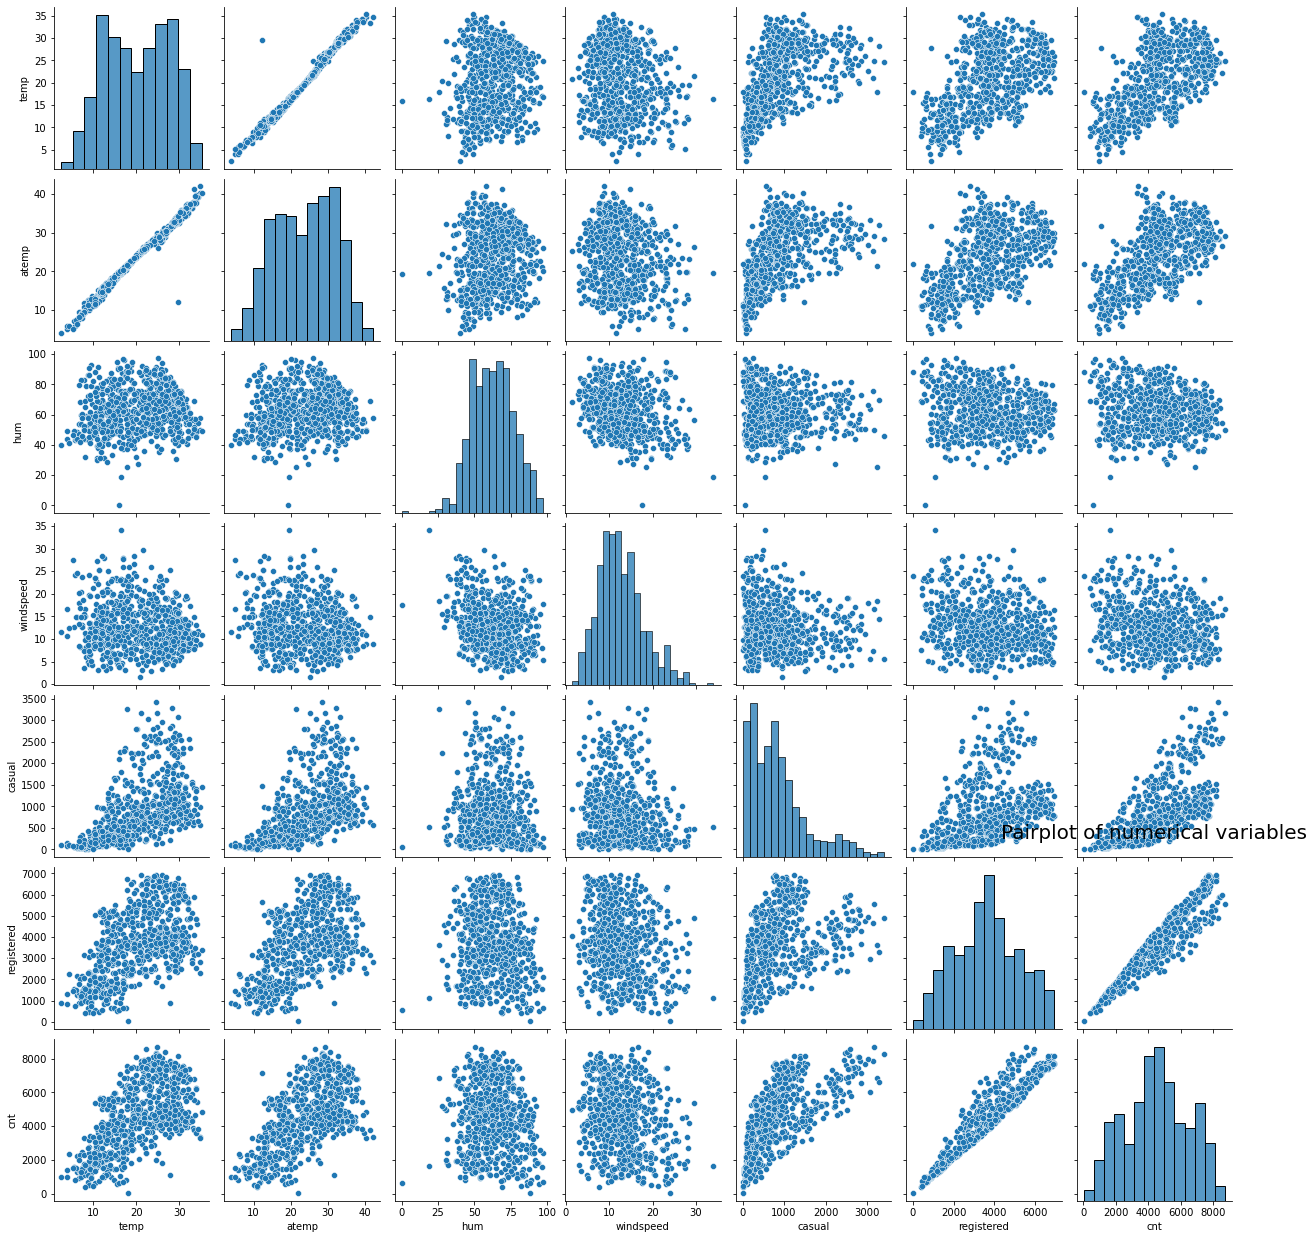

In [746]:
#pairplot of numerical variables
sns.pairplot(df_num)
plt.title("Pairplot of numerical variables\n",fontsize=20)
plt.show()

### `Insights:`
- Registered and Casual have a positive linear relationship.
- Temp and atemp have a positive linear relationship.

### Categorical Variables

In [747]:
#selecting all categoricl variables
df_cat=day.select_dtypes(exclude=['float','datetime','int'])

In [748]:
df_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,0,Monday,1,Misty
1,spring,2018,Jan,0,Tuesday,1,Misty
2,spring,2018,Jan,0,Wednesday,1,Clear
3,spring,2018,Jan,0,Thursday,1,Clear
4,spring,2018,Jan,0,Friday,1,Clear


In [749]:
#categorical variable column names
df_cat.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

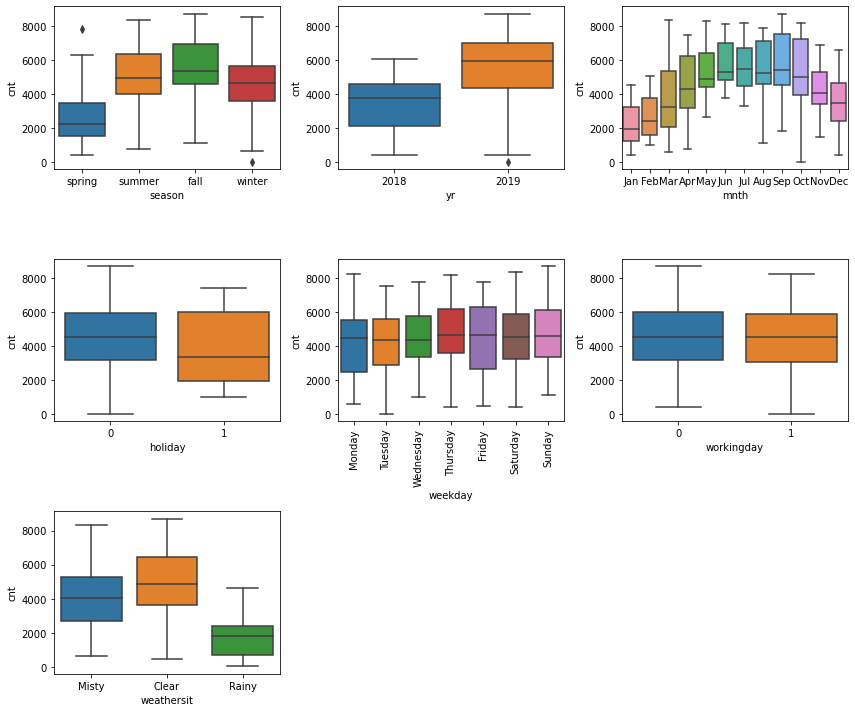

In [750]:
#bivariate analysis for categorical variables
plt.figure(figsize=(12,10))

plt.title("Bivariate Analysis of Categorical Variables\n\n",fontsize=20)
plt.subplot(3,3,1)
sns.boxplot(x=day.season,y=day.cnt)

plt.subplot(3,3,2)
sns.boxplot(x=day.yr,y=day.cnt)

plt.subplot(3,3,3)
sns.boxplot(x=day.mnth,y=day.cnt)

plt.subplot(3,3,4)
sns.boxplot(x=day.holiday,y=day.cnt)

plt.subplot(3,3,5)
sns.boxplot(x=day.weekday,y=day.cnt)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x=day.workingday,y=day.cnt)

plt.subplot(3,3,7)
sns.boxplot(x=day.weathersit,y=day.cnt)

plt.tight_layout()

plt.show()

### `Insights:`
- Spring has a narrower distribution among the data
- The months range increase and peaks and then decreases as per the boxplot


### Correlation

In [751]:
#correlation of numerical variables
corr=df_num.corr()

<Figure size 432x288 with 0 Axes>

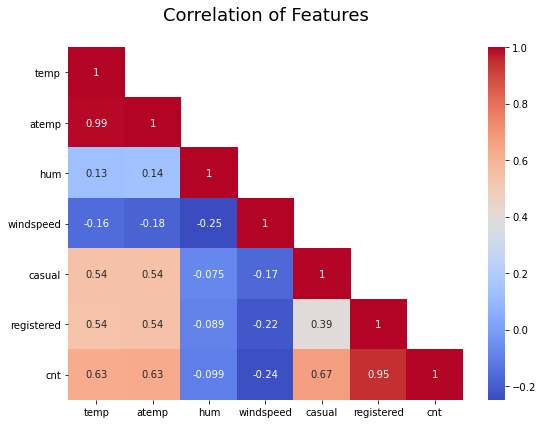

In [752]:
#heatmap of numerical variables
plt.tight_layout()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=[8,6])
plt.title("Correlation of Features\n",fontsize=18)
sns.heatmap(df_num.corr(),annot=True,mask=mask,cmap='coolwarm')
plt.tight_layout()
plt.show()

We plot a heatmap to check for correlation between the numerical variables, this is to check for multicollinearity prior to modelling. A correlation coefficient not between -0.7 and 0.7 is our benchmark for dropping columns to avoid multicollinearity in our model.

### `Insights:`
- Registered and Cnt have a high positive correlation.
- Atemp and temp have an almost perfect positive correlation

This indicates multicollinearity among these variables.

### Data Preparation

In [753]:
#assigning dummy vars for categorical columns in a dataframe
df_dummies=pd.get_dummies(df_cat,drop_first=True)

In [754]:
#drop duplicate categorical columns from day df
day=day.drop(list(df_cat.columns),axis=1)

In [755]:
#concatenating day and dummies dfs
day=pd.concat([day,df_dummies],axis=1)

In [756]:
day.shape

(730, 33)

In [757]:
day.head()

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Misty,weathersit_Rainy
0,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,...,0,1,0,0,0,0,0,1,1,0
1,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,...,0,0,0,0,0,1,0,1,1,0
2,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [758]:
day.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_1', 'weathersit_Misty', 'weathersit_Rainy'],
      dtype='object')

In [759]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             730 non-null    datetime64[ns]
 1   temp               730 non-null    float64       
 2   atemp              730 non-null    float64       
 3   hum                730 non-null    float64       
 4   windspeed          730 non-null    float64       
 5   casual             730 non-null    int64         
 6   registered         730 non-null    int64         
 7   cnt                730 non-null    int64         
 8   season_spring      730 non-null    uint8         
 9   season_summer      730 non-null    uint8         
 10  season_winter      730 non-null    uint8         
 11  yr_2019            730 non-null    uint8         
 12  mnth_Aug           730 non-null    uint8         
 13  mnth_Dec           730 non-null    uint8         
 14  mnth_Feb  

We are now dropping columns that are unnecessary for our modelling. We are dropping atemp and casual columns due to their multicollinearity with the temp and registered columns.

We are dropping dteday column because we already have separate columns for weekday,month and season.

In [760]:
#dropping unnecessary vars
day=day.drop(['atemp','registered','casual','dteday'],axis=1)

In [761]:
#creating X(independent) and y(dependent) variables
y=day.pop('cnt')
X=day

In [762]:
X.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_Misty,weathersit_Rainy
0,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [763]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### Train Test Split

In [764]:
#importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [765]:
#splitting data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [766]:
X_train.shape

(584, 28)

In [767]:
X_test.shape

(146, 28)

In [768]:
#list of numerical variables 
num_vars=list(X_train.describe().columns)
num_vars

['temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'holiday_1',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'workingday_1',
 'weathersit_Misty',
 'weathersit_Rainy']

### Scaling

In [769]:
#import standard scaler and scaling of numerical variables of train and test data (X variable)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[num_vars]=sc.fit_transform(X_train[num_vars])
X_test[num_vars] = sc.transform(X_test[num_vars])

In [770]:
#importing linear regression from sklearn and fitting on train data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [771]:
#coefficient of train data 
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
temp,839.252198
hum,-201.904302
windspeed,-215.940764
season_spring,-420.204423
season_summer,48.176426
season_winter,319.358558
yr_2019,985.730561
mnth_Aug,-26.749255
mnth_Dec,-117.441871
mnth_Feb,-22.942101


In [772]:
#intercept of regressor
lm.intercept_

4546.361301369863

In [773]:
#predicted values on test data
y_pred=lm.predict(X_test)

In [774]:
#actual vs predicated values
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [775]:
#actual vs predicated values of test data
df

,Actual,Predicted
468,7460,6266.602189
148,4788,4448.906557
302,3331,3781.073123
355,3068,1869.194699
515,7338,7248.508404
...,...,...
404,3830,3773.328962
390,4075,3608.560326
218,3785,4473.689873
135,3958,4433.590466


In [776]:
#import r2_score and check r2 for test data
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8594068226029887

### RFE

In [777]:
#import RFE from sklearn
from sklearn.feature_selection import RFE

In [778]:
#running rfe for 20 variables
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [779]:
#rfe ranking and significance
list(zip(X_train,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 10),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 9),
 ('workingday_1', False, 6),
 ('weathersit_Misty', True, 1),
 ('weathersit_Rainy', True, 1)]

In [780]:
#length of ranked columns
len(X_train.columns[rfe.support_])

15

In [781]:
#assigning rfe selected variables
rfe_col=X_train.columns[rfe.support_]

In [782]:
#dropping unselected varaibles
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_May', 'mnth_Nov', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Wednesday', 'workingday_1'],
      dtype='object')

In [783]:
#rfe selected columns
X_train_rfe=X_train[rfe_col]

In [784]:
#importing vif from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model Building

In [785]:
#function for building model, model summary, and vif values
def build_model(X,y):
    X=sm.add_constant(X)
    lm=sm.OLS(y,X).fit()
    print(lm.summary())
    return X

def checkvif(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif["VIF"],2)
    vif=vif.sort_values("VIF",ascending=False,ignore_index=True)
    return vif

### Model 1

In [786]:
#model 1
lm1=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          8.09e-213
Time:                        18:43:29   Log-Likelihood:                -4722.8
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     568   BIC:                             9547.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     33.015  

In [787]:
#vif of model 1
checkvif(lm1)

,Features,VIF
0,season_spring,5.07
1,season_winter,4.09
2,temp,3.77
3,season_summer,2.23
4,hum,1.91
5,weathersit_Misty,1.59
6,mnth_Oct,1.57
7,weathersit_Rainy,1.33
8,mnth_Sep,1.21
9,windspeed,1.19


The Spring column has high vif value, however we know from the rfe ranking and from the bivariate analysis that the Spring season has an impact on the count. 
So, let us first drop columns that have little to no impact on our model. Starting with months/day as they follow a similar pattern to the seasons as per our boxplot.

### Model 2

In [788]:
#dropping march column and building model 2
X_train_2=X_train_rfe.drop(['mnth_Mar'],1,)
lm2=build_model(X_train_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          2.00e-212
Time:                        18:43:29   Log-Likelihood:                -4726.5
No. Observations:                 584   AIC:                             9483.
Df Residuals:                     569   BIC:                             9549.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     33.196  

In [789]:
#vif of model 2
checkvif(lm2)

,Features,VIF
0,season_spring,4.97
1,season_winter,4.09
2,temp,3.77
3,season_summer,2.19
4,hum,1.90
5,weathersit_Misty,1.58
6,mnth_Oct,1.57
7,weathersit_Rainy,1.33
8,mnth_Sep,1.21
9,windspeed,1.18


The adjusted r2 values has reduced by 0.001.

All the vif values are under 5.

We shall drop the Tuesday and Monday column for it's low coefficient value.

### Model 3

In [790]:
#dropping tuesday column and building model 3
X_train_3=X_train_2.drop(['weekday_Tuesday'],1,)
lm3=build_model(X_train_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          4.87e-212
Time:                        18:43:29   Log-Likelihood:                -4730.2
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     570   BIC:                             9550.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     33.378  

In [791]:
#checking vif of model 3
checkvif(lm3)

,Features,VIF
0,season_spring,4.97
1,season_winter,4.09
2,temp,3.77
3,season_summer,2.19
4,hum,1.90
5,weathersit_Misty,1.58
6,mnth_Oct,1.57
7,weathersit_Rainy,1.32
8,mnth_Sep,1.21
9,windspeed,1.18


### Model 4

In [792]:
#dropping monday column and building model 4
X_train_4=X_train_3.drop('weekday_Monday',1,)
lm4=build_model(X_train_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     234.6
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.33e-211
Time:                        18:43:29   Log-Likelihood:                -4734.1
No. Observations:                 584   AIC:                             9494.
Df Residuals:                     571   BIC:                             9551.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     33.571  

In [793]:
#check vif of model 4
checkvif(lm4)

,Features,VIF
0,season_spring,4.96
1,season_winter,4.08
2,temp,3.75
3,season_summer,2.19
4,hum,1.90
5,weathersit_Misty,1.58
6,mnth_Oct,1.57
7,weathersit_Rainy,1.32
8,mnth_Sep,1.21
9,windspeed,1.18


We will drop the Holiday column for its low coefficient value

### Model 5

In [794]:
#dropping holiday column and building model 5
X_train_5=X_train_4.drop('holiday_1',1,)
lm5=build_model(X_train_5,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     249.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          7.28e-210
Time:                        18:43:29   Log-Likelihood:                -4741.0
No. Observations:                 584   AIC:                             9506.
Df Residuals:                     572   BIC:                             9559.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     33.943  

In [795]:
#check vif of model 5
checkvif(lm5)

,Features,VIF
0,season_spring,4.96
1,season_winter,4.08
2,temp,3.75
3,season_summer,2.19
4,hum,1.90
5,weathersit_Misty,1.58
6,mnth_Oct,1.57
7,weathersit_Rainy,1.32
8,mnth_Sep,1.21
9,windspeed,1.18


### Model 6

In [796]:
#dropping October column and building model 5
X_train_6=X_train_5.drop('mnth_Oct',1,)
lm5=build_model(X_train_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          2.82e-207
Time:                        18:43:29   Log-Likelihood:                -4750.0
No. Observations:                 584   AIC:                             9522.
Df Residuals:                     573   BIC:                             9570.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4546.3613     34.440  

In [813]:
checkvif(X_train_6)

,Features,VIF
0,season_spring,4.81
1,temp,3.54
2,season_winter,3.17
3,season_summer,2.18
4,hum,1.90
5,weathersit_Misty,1.58
6,weathersit_Rainy,1.31
7,mnth_Sep,1.19
8,windspeed,1.18
9,yr_2019,1.03


Now, all vif values are below 5. 

We have narrowed the features down to 10 (excluding the Constant).

We shall use these features for our model.

The coefficients explain the increase/decrease in one unit of the target variable ('cnt').

### Correlation of Selected Features

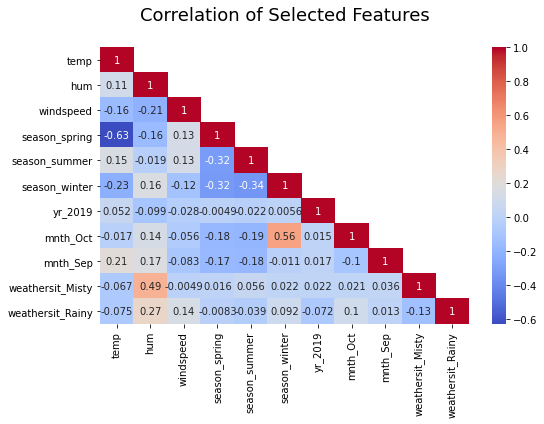

In [814]:
corr_f=X_train_5.corr()
mask=np.array(corr_f)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=[8,6])
plt.title("Correlation of Selected Features\n",fontsize=18)
sns.heatmap(X_train_10.corr(),annot=True,mask=mask,cmap='coolwarm')
plt.tight_layout()
plt.show()

We can see that temp and spring have a negative linear relationship. As this value is below -0.7, we shall leave the model as it is.

## Residual Analysis of Training Data

In [815]:
#adding constant to chosen variables
X_train_lm=sm.add_constant(X_train_6)

In [816]:
#Ols for train data of chosen variables
lr_m=sm.OLS(y_train,X_train_lm).fit()

In [817]:
#predicted values on train data
y_train_pred=lr_m.predict(X_train_lm)

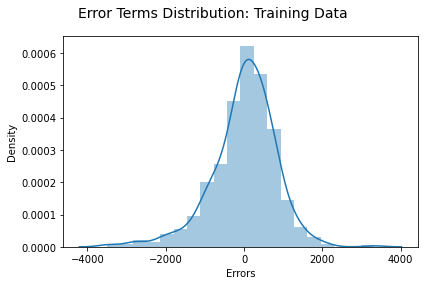

In [818]:
#Error terms distplot for training data after feature selection
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle("Error Terms Distribution: Training Data",fontsize=14)
plt.xlabel("Errors")
plt.tight_layout()
plt.show()

From the above histogram, we can see the residuals are normally distributed. Showing that our assumption of a linear relationship is valid.

## Model Evaluation

In [819]:
X_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Sep,weathersit_Misty,weathersit_Rainy
468,-0.036858,-0.927548,0.061038,-0.545690,1.732051,-0.585260,0.976308,-0.305995,-0.724434,-0.18338
148,0.909802,1.293755,0.368750,-0.545690,1.732051,-0.585260,-1.024267,-0.305995,-0.724434,-0.18338
302,-1.001808,-0.077711,-0.130104,-0.545690,-0.577350,1.708644,-1.024267,-0.305995,-0.724434,-0.18338
355,-0.430158,0.862974,-1.858961,1.832542,-0.577350,-0.585260,-1.024267,-0.305995,1.380389,-0.18338
515,0.978401,-0.997880,0.119343,-0.545690,1.732051,-0.585260,0.976308,-0.305995,-0.724434,-0.18338


In [820]:
y_test

468    7460
148    4788
302    3331
355    3068
515    7338
       ... 
404    3830
390    4075
218    3785
135    3958
260    4274
Name: cnt, Length: 146, dtype: int64

In [821]:
X_test.describe()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Sep,weathersit_Misty,weathersit_Rainy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.168052,-0.251346,0.277441,0.203616,0.023727,-0.129621,-0.119897,-0.061199,-0.075687,-0.106168
std,1.012643,0.981181,1.145640,1.108594,1.016817,0.918347,0.999106,0.905871,0.975263,0.657427
min,-2.218888,-3.142993,-1.858961,-0.545690,-0.577350,-0.585260,-1.024267,-0.305995,-0.724434,-0.183380
25%,-1.029450,-0.940736,-0.618421,-0.545690,-0.577350,-0.585260,-1.024267,-0.305995,-0.724434,-0.183380
50%,-0.299818,-0.356108,0.189992,-0.545690,-0.577350,-0.585260,-1.024267,-0.305995,-0.724434,-0.183380
75%,0.756597,0.414039,0.736618,1.832542,1.732051,-0.585260,0.976308,-0.305995,1.380389,-0.183380
max,1.801583,2.375103,4.292170,1.832542,1.732051,1.708644,0.976308,3.268027,1.380389,5.453150


In [822]:
#fitting line on test data
final_col=X_train_6.columns
X_test=X_test[final_col]
X_test_lm=sm.add_constant(X_test)

In [823]:
#predicted on test data
y_test_pred=lr_m.predict(X_test_lm)

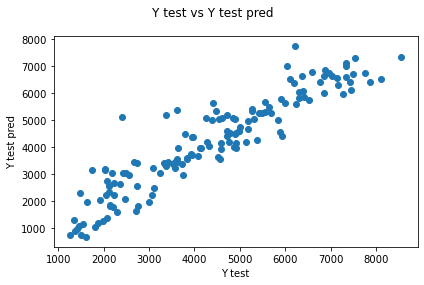

In [824]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle("Y test vs Y test pred",fontsize=12)
plt.xlabel("Y test")
plt.ylabel("Y test pred")
plt.tight_layout()
plt.show()

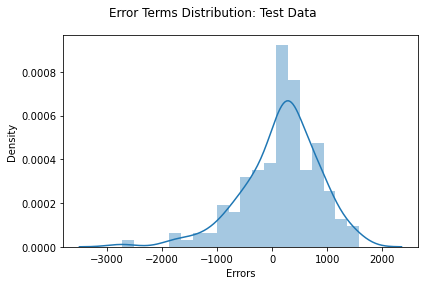

In [825]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=20)
fig.suptitle("Error Terms Distribution: Test Data",fontsize=12)
plt.xlabel("Errors")
plt.tight_layout()
plt.show()

`Insights:`

- We can see the residuals follow a normal distribution in the Test data also.
- The scatterplot of test and predicated data shows that there exists linear relationship is valid.

### rsquared

In [826]:
r2=r2_score(y_test,y_test_pred)
r2

0.8534333816301823

### adjusted rsquared

Formula for Adjusted R^2

𝑅2𝑎𝑑𝑗.=1−(1−𝑅2)∗𝑛−1𝑛−k−1


Where, 
n is the number of points in our dataset (rows)
k is the number of independent variables in the model (columns)

In [827]:
X_test.shape

(146, 10)

In [828]:
n=X_test.shape[0]
k=X_test.shape[1]

In [829]:
adjusted_r2=1-(((1-r2)*(n-1))/(n-k-1))
adjusted_r2

0.8425765950842699

## Final Evaluation

### Training data

r2= 0.822

adjusted r2= 0.819

### Test data

r2= 0.853

adjusted r2= 0.843

The r2 values and adjusted r2 values of the training and test data are very similar.

This is a good model that has error terms normally distributed, the model is able to predict on the test data with similar accuracy to the training data, and confirms the existence of a linear relationship

## Equation for Best fit line

We can see that the equation of our best fitted line is:


**`cnt =970.5 * temp - 213.98 * hum - 228.16 * windspeed - -259.29 * season_spring + 247.22 * season_summer + 393.50 * season_winter + 984.75 * yr_2019 + 221.16 * mnth_sep - 187.78 * weathersit_Misty - 344.11 * weathersit_Rainy`**
